# KNN Assignment
The dataset 'bank_marketing.csv' is related with direct marketing campaigns (phone calls) of a banking institution. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Important: When you read the csv file, you might need to manipulate the columsn somehow for better printing.

For more information abour the dataset, please check out the link below:
https://archive.ics.uci.edu/dataset/222/bank+marketing

## Step 1: import necessary libraries and load the dataset

In [1]:
import pandas as pd

## Step 2: Preprocessing
Convert categorical variables into numerical; one way to do is Label Encoding.

In [2]:
# read the CSV with the ; separator
df = pd.read_csv('data/bank_marketing.csv', sep=';')
print(df.head())
print(df.shape)
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

We can see from the above code that there are no missing values in the dataset.

Let's get an inventory of all the unqiue values in each feature so we can plan out the preprocessing approach. This also can be a method to spot bad data or slight variations within the data.

In [3]:
# List of columns to check for unique values
columns_to_check = df.columns

# Print unique values for each column
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique values in 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in 'marital':
['married' 'single' 'divorced' 'unknown']

Unique values in 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in 'default':
['no' 'unknown' 'yes']

Unique values in 'housing':
['no' 'yes' 'unknown']

Unique values in 'loan':
['no' 'yes' 'unknown']

Unique values in 'contact':
['telephone' 'cellular']

Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique values in 'day_of_week':
['mon' 'tue' 'we

We can:
- remove duplicate entries from the dataset.
- remove bad training data like minors or unmanaged living records (ages over 100) from the test set.
- validate there are not any NULL values.
- potentially replace '999' in the pdays feature with 'unknown' since it seems to be a placeholder.

The dataset has many binary questions filled in with 'unknown' values. One experiment to look at later in this notebook would be how does removing those rows of data impact the model's performance? Could we create synthetic training data that improves the model performance once the vague data is removed?

In [4]:
# we can remove the contact feature since there will not be any correlation between contact and the target variable
df.drop('contact', axis=1, inplace=True)

# check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

# dop dupicates
df.drop_duplicates(inplace=True)
print("\nNumber of duplicates after dropping:", df.duplicated().sum())


Number of duplicates: 12

Number of duplicates after dropping: 0


Let's see if we can find any bad data like minors in the age column.This does not benefit our training data because they can skew our model's bias by showing many 'non defaulted' data rows, even though they have not really had the opportunity to default.

In [ ]:
valid_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
valid_days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
valid_y = ['yes', 'no']

# shape of the dataset before dropping bad data
print("Shape of the dataset before dropping bad data: ", df.shape)

# Search for invalid age values (under 18 or over 100)
invalid_age = df[(df['age'] < 18) | (df['age'] > 100)]
print("Invalid age entries:\n", invalid_age)

# Drop invalid age values
df = df.drop(invalid_age.index)

# Validate 'month' column
invalid_month = df[~df['month'].isin(valid_months)]
if invalid_month.empty:
    print("No invalid month entries.")
else:
    print("Invalid month entries:\n", invalid_month)

# Validate 'day_of_week' column
invalid_day = df[~df['day_of_week'].isin(valid_days)]
if invalid_day.empty:
    print("No invalid day_of_week entries.")
else:
    print("Invalid day_of_week entries:\n", invalid_day)

# Validate 'y' column
invalid_y = df[~df['y'].isin(valid_y)]
if invalid_y.empty:
    print("No invalid y entries.")
else:
    print("Invalid y entries:\n", invalid_y)

# shape of the dataset after dropping bad data
print("Shape of the dataset after dropping bad data: ", df.shape)

Shape of the dataset before dropping bad data:  (41176, 20)
Invalid age entries:
        age      job marital education default  housing     loan month  \
37140   17  student  single   unknown      no      yes       no   aug   
37539   17  student  single  basic.9y      no      yes       no   aug   
37558   17  student  single  basic.9y      no      yes       no   aug   
37579   17  student  single  basic.9y      no  unknown  unknown   aug   
38274   17  student  single   unknown      no       no      yes   oct   

      day_of_week  duration  campaign  pdays  previous poutcome  emp.var.rate  \
37140         wed       432         3      4         2  success          -2.9   
37539         fri       182         2    999         2  failure          -2.9   
37558         fri        92         3      4         2  success          -2.9   
37579         fri       498         2    999         1  failure          -2.9   
38274         tue       896         1      2         2  success          -

cons.price.idx, cons.conf.idx, euribor3m, nr.employed, emp. var.rate are all quantitative features. Let's review them to see if there are any outliers that could skew the training.

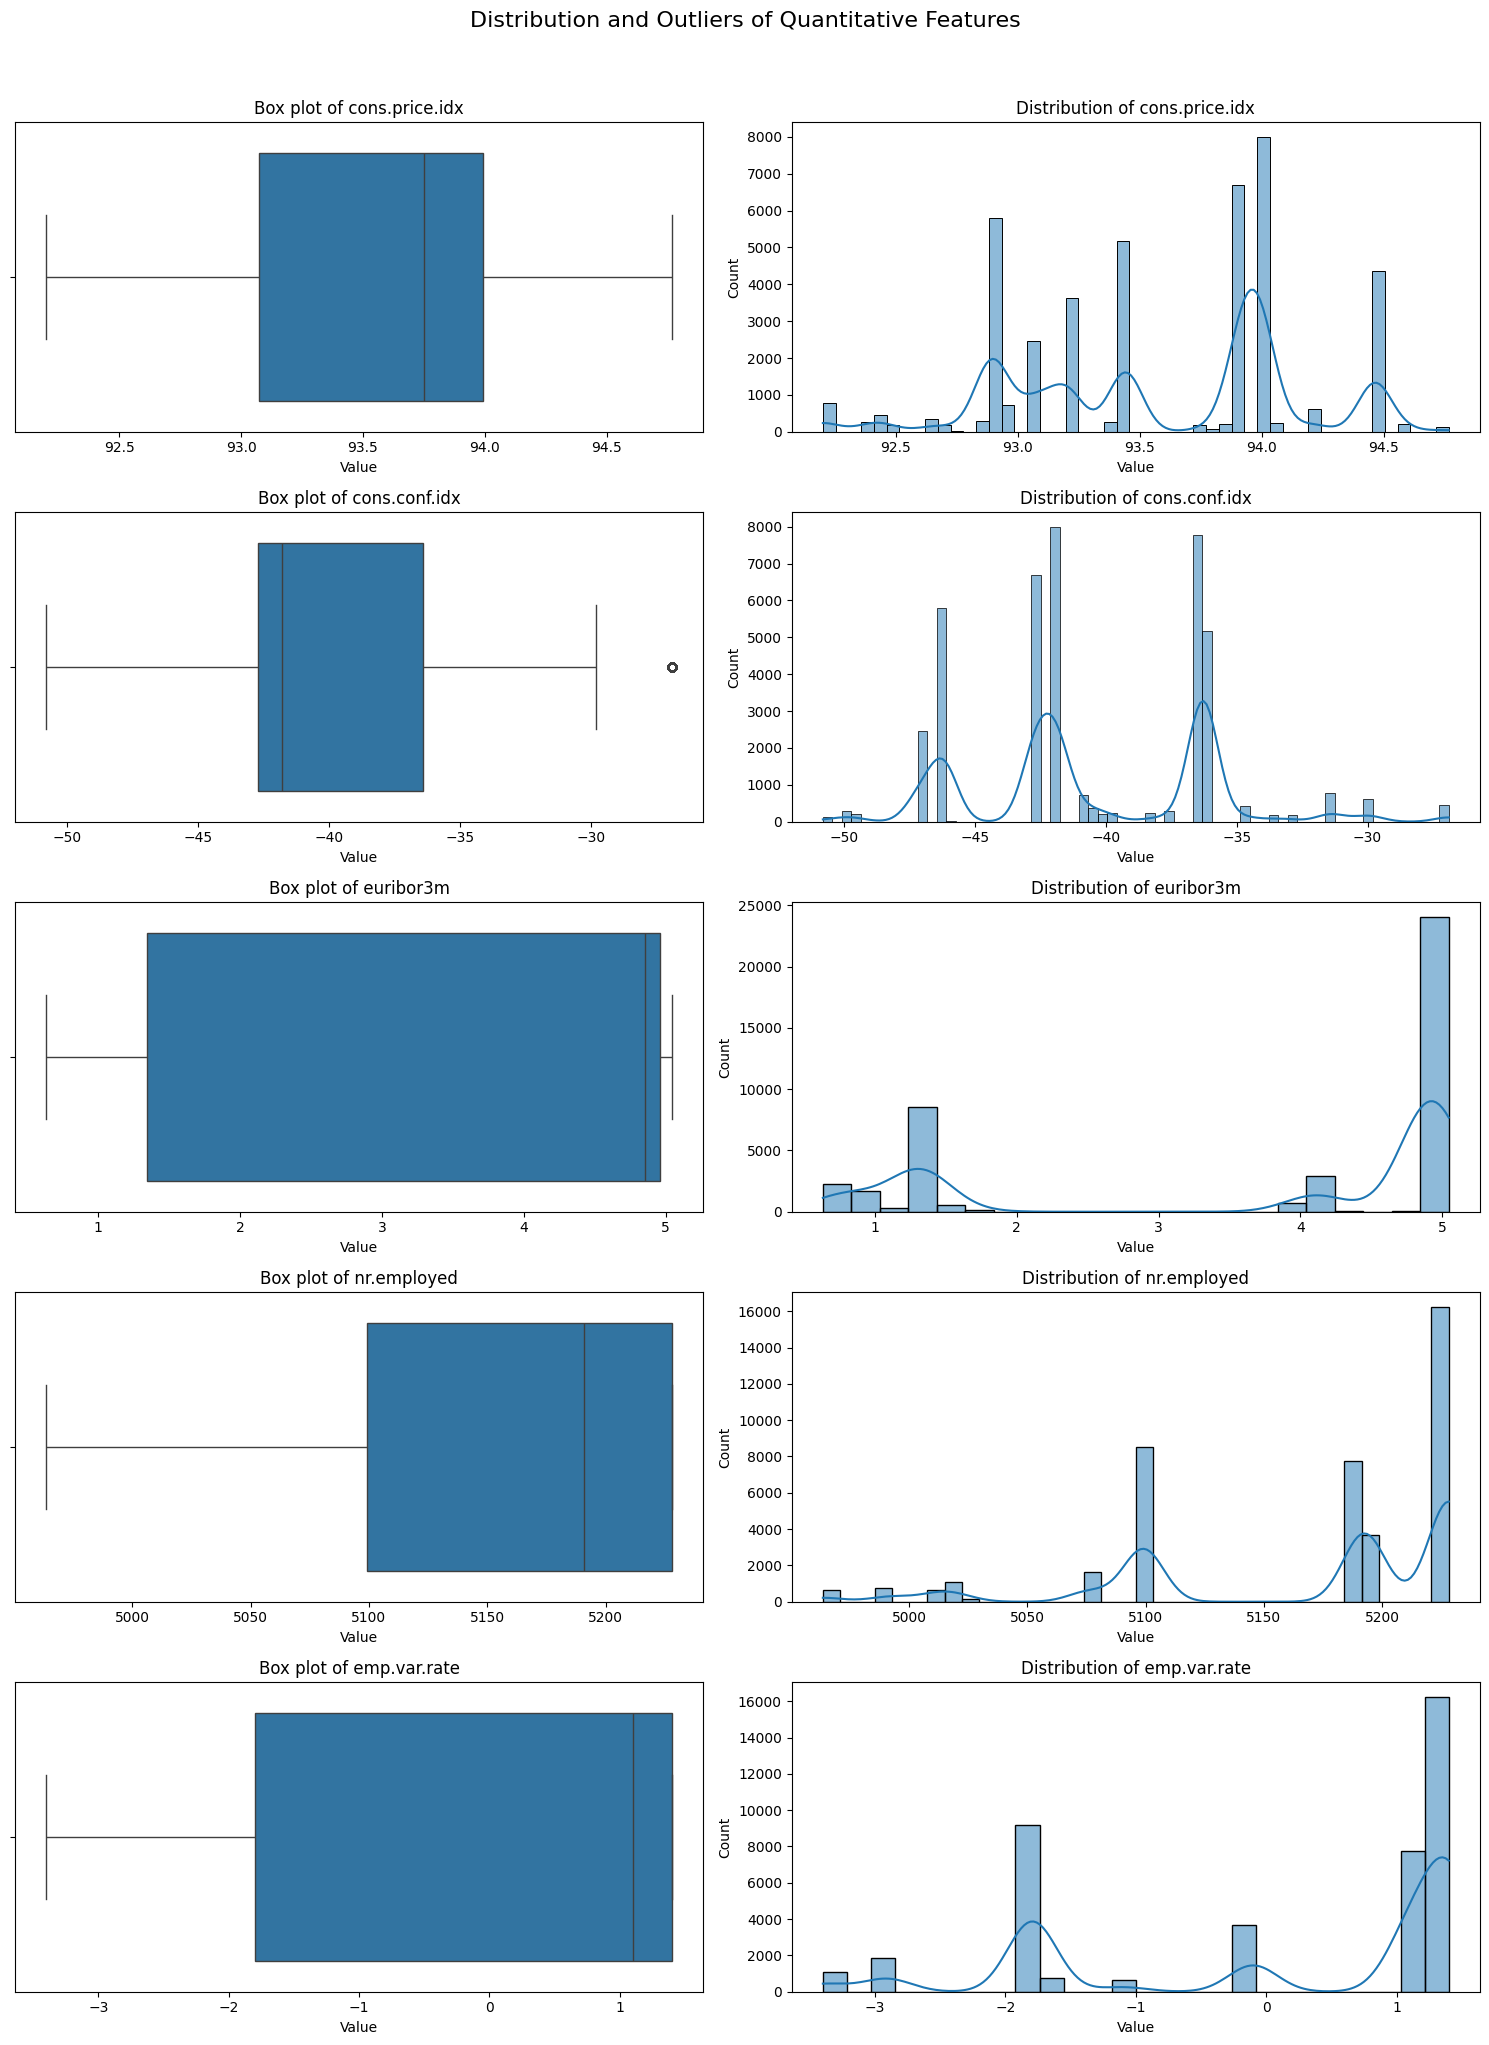

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of quantitative features to check for outliers
quantitative_features = ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'emp.var.rate']

# Create box plots and histograms for each quantitative feature
fig, axes = plt.subplots(len(quantitative_features), 2, figsize=(15, 4*len(quantitative_features)))
fig.suptitle('Distribution and Outliers of Quantitative Features', fontsize=16, y=1.02)

for i, feature in enumerate(quantitative_features):
    # Box plot
    sns.boxplot(x=df[feature], ax=axes[i,0])
    axes[i,0].set_title(f'Box plot of {feature}')
    axes[i,0].set_xlabel('Value')
    
    # Histogram with KDE
    sns.histplot(df[feature], kde=True, ax=axes[i,1])
    axes[i,1].set_title(f'Distribution of {feature}')
    axes[i,1].set_xlabel('Value')

plt.tight_layout()
plt.show()

From the visualiazations which help us understand the data better, we see it is beneficial to filter outliers.

In [ ]:
print("Shape of the dataset before removing outliers: ", df.shape)

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each quantitative feature
for feature in quantitative_features:
    df = remove_outliers(df, feature)

# Print the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers: ", df.shape)

Shape of the dataset before removing outliers:  (41171, 20)
Shape of the dataset after removing outliers:  (40726, 20)


## Step 3: Define features (X) and target (y)

## Step 4: Scale the features (important for KNN)

## Step 5: Split into training and test sets (80 & 20)

## Step 6: Find the optimal K using 5-fold cross-validation

## Step 7: Plot the error rate for different K values

## Step 8: Find and print the optimal K (K with the minimum error rate)

## Step 9: Train the final KNN model with the optimal K

## Step 10: Make predictions

## Step 11: Model evaluation